In [1]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [2]:
cryptodatafile = 'merged_crypto_data.csv'
RawCrypto_df = pd.read_csv(cryptodatafile)

RawCrypto_df.head()


,Coin,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,5.344389e+10,"$841,428,977,515"
1,bitcoin,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,4.591095e+10,"$860,978,135,421"
2,bitcoin,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,3.509680e+11,"$863,752,275,053"
3,bitcoin,"Feb 25, 2021",49709.08,51948.97,47093.85,47093.85,5.450657e+10,"$877,766,126,138"
4,bitcoin,"Feb 24, 2021",48835.09,51290.14,47213.50,49705.33,6.369552e+10,"$926,393,090,751"


In [3]:
# Function to convert "Date" to usable / sortable format 
def monthToNum(shortMonth):
    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]
splitdate = pd.DataFrame()
splitdate[['month','day','year']] = RawCrypto_df['Date'].str.split("\s|,", 2, expand=True)
splitdate['month'] = splitdate['month'].str.lower()
splitdate['month'] = splitdate['month'].apply(monthToNum)

# Insert Datestamp YYYMMDD Column for sorting 
RawCrypto_df.insert(1,'Datestamp',pd.to_datetime(splitdate[['year','month','day']]))
RawCrypto_df.dtypes

# Recast Coin names as Title-case 
RawCrypto_df['Coin'] = RawCrypto_df['Coin'].str.title()

In [4]:
coinlist = ['Bitcoin','Ethereum','Litecoin','Iota','Monero','Dash']
tier1_coinlist = ['bitcoin']
tier2_coinlist = ['ethereum','litecoin']
tier3_coinlist = ['iota','dash','monero','waves','stratis']
colourdict = {'Bitcoin':'dodgerblue',
'Ethereum':'orangered',
'Litecoin':'orange',
'Iota':'greenyellow',
'Monero':'forestgreen',
'Dash':'darkturquoise'}

colourdict['Bitcoin']

'dodgerblue'

In [ ]:
# DEPRECATED
# ethereum_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'ethereum'].sort_values(by='Datestamp')
# litecoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'litecoin'].sort_values(by='Datestamp')
# bitcoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'bitcoin'].sort_values(by='Datestamp')
# iota_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'iota'].sort_values(by='Datestamp')
# monero_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'monero'].sort_values(by='Datestamp')
# dash_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'dash'].sort_values(by='Datestamp')



In [ ]:
# DEPRECATED
# # bitcoin_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))
# plt.plot(bitcoin_groupbymonth_df[['High']].std())
# plt.title('Standard Deviation of Monthly High/Low prices')

In [ ]:
# DEPRECATED
# plt.plot(bitcoin_groupbymonth_df[['Low',]].min())
# plt.plot(bitcoin_groupbymonth_df[['High']].max())
# plt.title('Lowest and Highest Prices By Month')
# plt.show()

In [ ]:
# DEPRECATED
# delta = ethereum_groupbymonth_df['High'].max()
# delta = pd.DataFrame(delta)
# delta['Low'] = ethereum_groupbymonth_df['Low'].min()
# delta['Delta'] = delta['High'] - delta['Low']
# plt.plot(delta['High'], color = 'red')
# plt.plot(delta['Low'], color = 'red')
# delta['x1'] = delta.index
# plt.fill_between(x=delta['x1'], y1=delta['Low'], y2=delta['High'], color = 'red')
# plt.title("Difference between a month's Highest and Lowest price")


In [5]:
# First Coin Loop, create GroupBy tables 

for coin in coinlist:
    # create multiple dataframes for coins, sort by date 
    globals()[f"{coin}_df"] = RawCrypto_df.loc[RawCrypto_df['Coin'] == coin].sort_values(by='Datestamp')
    # create mutliple groupby tables 
    exec(f"{coin}_groupbymonth_df = {coin}_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))")

Bitcoin_groupbymonth_df.mean()

,Open,High,Low,Close,Volume
Datestamp,,,,,
2013-04-30,139.220000,147.210000,134.025000,141.770000,0.000000e+00
2013-05-31,120.292258,123.948710,114.253226,119.992581,0.000000e+00
2013-06-30,108.856667,111.300667,104.602000,107.761333,0.000000e+00
2013-07-31,90.311290,93.869032,86.719677,90.512258,0.000000e+00
2013-08-31,113.041935,116.002258,111.387742,113.905161,0.000000e+00
...,...,...,...,...,...
2020-10-31,11791.306774,12018.847742,11648.077097,11886.978387,3.389918e+10
2020-11-30,16450.120667,16945.980667,16064.074333,16645.757333,3.643816e+10
2020-12-31,21680.541290,22354.685806,21229.361613,21983.136774,3.910515e+10


<Figure size 432x288 with 0 Axes>

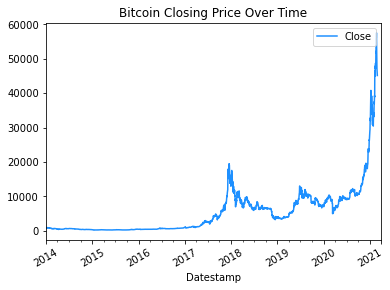

<Figure size 432x288 with 0 Axes>

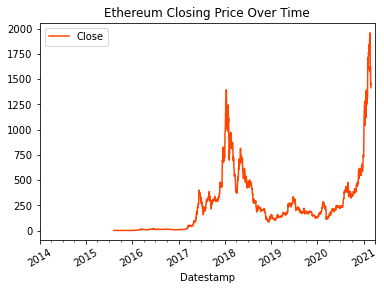

<Figure size 432x288 with 0 Axes>

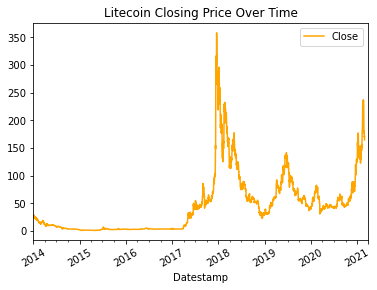

<Figure size 432x288 with 0 Axes>

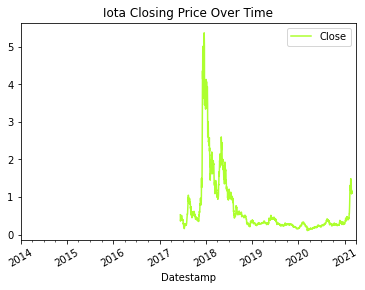

<Figure size 432x288 with 0 Axes>

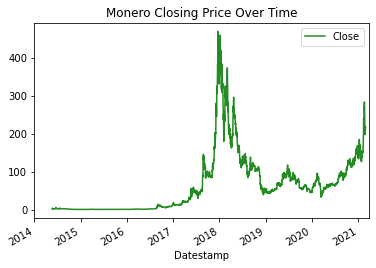

<Figure size 432x288 with 0 Axes>

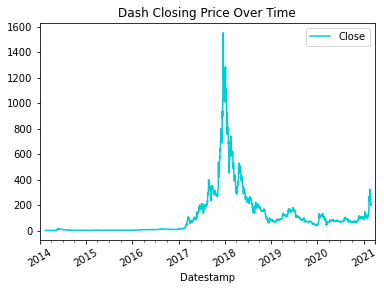

In [6]:
xticklist = [2014,2015,2016,2017,2018,2019,2020,2021,2022]
for coin in coinlist:
    plt.figure()

    exec(f"ax = {coin}_df.plot('Datestamp','Close',color=colourdict['{coin}'])")
    # exec(f"plt.plot({coin}_df['Date'],{coin}_df['Close'], color=colourdict['{coin}'])")
    exec(f"plt.title('{coin} Closing Price Over Time')")
    plt.setp(ax.get_xticklabels(), rotation = 30)
    ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2021-03-28'))

    # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    # fmt = mdates.DateFormatter(xticklist)
    # ax.xaxis.set_major_formatter(fmt)
    # exec(f"formatter = matplotlib.dates.DateFormatter('%Y')")

plt.show()

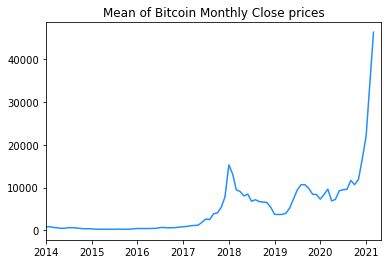

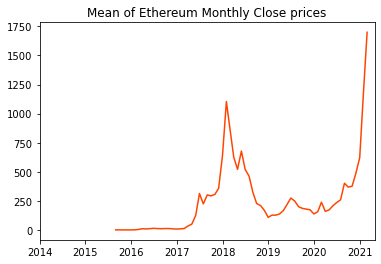

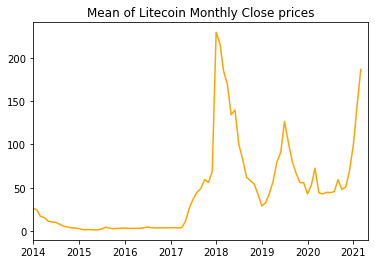

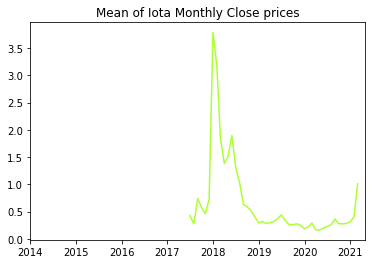

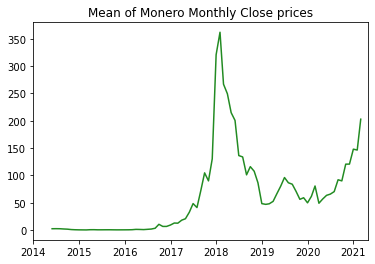

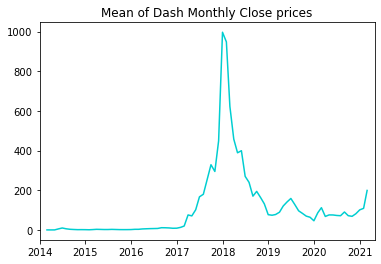

In [11]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['Close']].mean(), color=colourdict['{coin}'])")
    exec(f"plt.title('Mean of {coin} Monthly Close prices')")
    plt.xlim([datetime.date(2014,1,1), datetime.date(2021,4,28)])

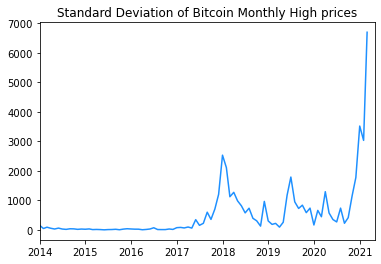

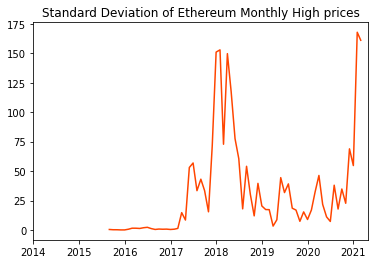

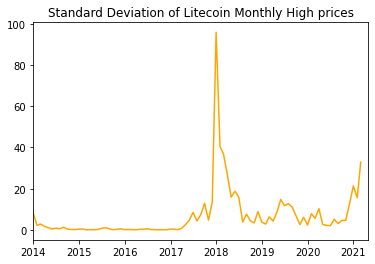

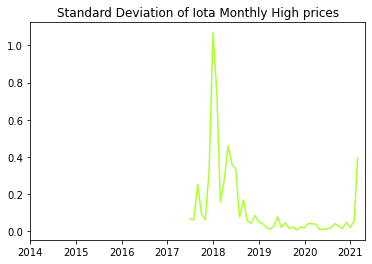

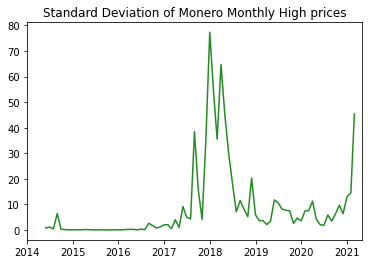

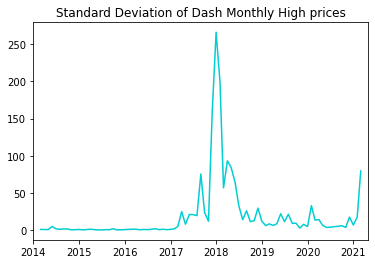

In [12]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].std(),color=colourdict['{coin}'])")
    exec(f"plt.title('Standard Deviation of {coin} Monthly High prices')")
    plt.xlim([datetime.date(2014,1,1), datetime.date(2021,4,28)])

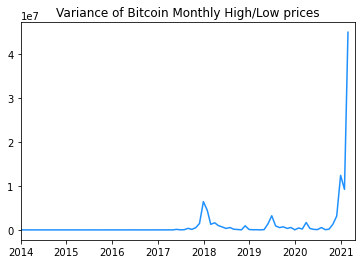

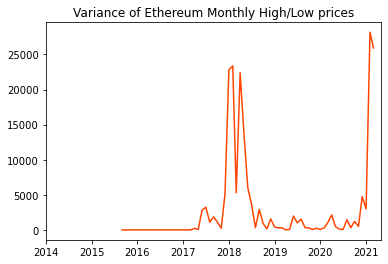

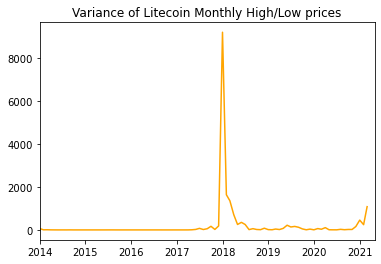

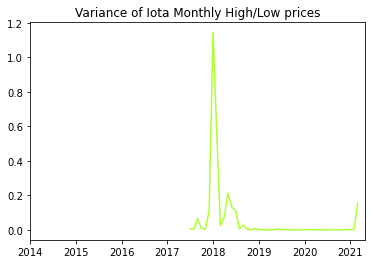

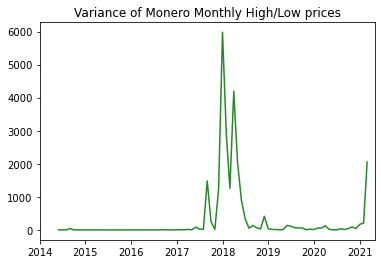

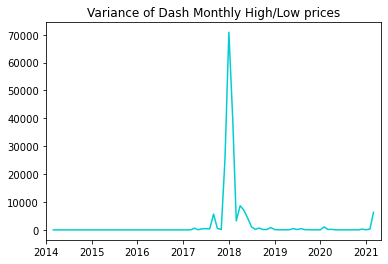

In [13]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].var(),color=colourdict['{coin}'])")
    exec(f"plt.title('Variance of {coin} Monthly High/Low prices')")  
    plt.xlim([datetime.date(2014,1,1), datetime.date(2021,4,28)]) 

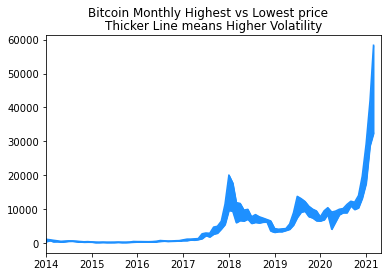

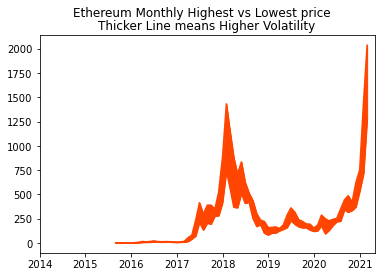

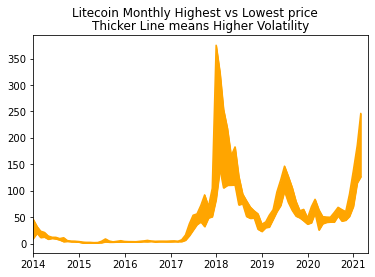

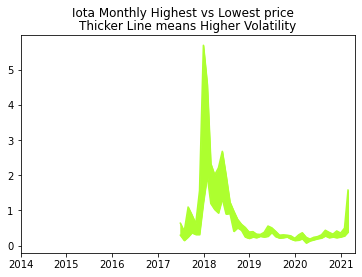

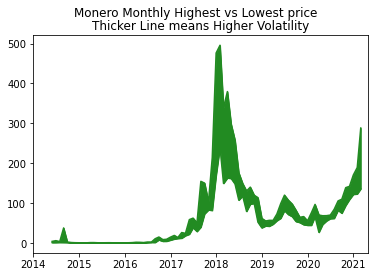

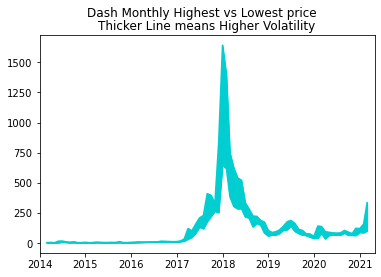

In [14]:
for coin in coinlist:
    exec(f"{coin}_delta = {coin}_groupbymonth_df['High'].max()")
    exec(f"{coin}_delta = pd.DataFrame({coin}_delta)")
    exec(f"{coin}_delta['Low'] = {coin}_groupbymonth_df['Low'].min()")
    exec(f"{coin}_delta['HighLowDelta'] = {coin}_delta['High'] - {coin}_delta['Low']")
    exec(f"{coin}_delta['Close'] = {coin}_groupbymonth_df['Close'].max()")
    exec(f"{coin}_delta['CloseDiff'] = {coin}_delta['Close'].diff()")
    exec(f"{coin}_delta['PctChange'] = ({coin}_delta['CloseDiff']) / ({coin}_delta['Close'] - {coin}_delta['CloseDiff']) * 100 ")    
    plt.figure()
    exec(f"plt.plot({coin}_delta['High'], color=colourdict['{coin}'])")
    exec(f"plt.plot({coin}_delta['Low'], color=colourdict['{coin}'])")
    exec(f"{coin}_delta['x1'] = {coin}_delta.index")
    exec(f"plt.fill_between(x={coin}_delta['x1'], y1={coin}_delta['Low'], y2={coin}_delta['High'], color=colourdict['{coin}'])")
    exec(f"plt.suptitle('{coin} Monthly Highest vs Lowest price')")
    exec(f"plt.title('Thicker Line means Higher Volatility')")
    plt.xlim([datetime.date(2014,1,1), datetime.date(2021,4,28)])
# color=colourdict['{coin}'])

In [ ]:
for coin in reversed(coinlist):
    exec(f"plt.plot({coin}_delta[['PctChange']],color=colourdict['{coin}'], linewidth =1.2, label='{coin}' )")
    exec(f"plt.title('% Change of Monthly Mean prices')")
    plt.xlabel('Timepoint')
    plt.ylabel('% Increase / Decrease')
    plt.xlim([datetime.date(2014,1,1), datetime.date(2021,4,28)])
    plt.ylim(-60,350)
    plt.axhline(y=0, color = 'black', linewidth = .5)
    plt.legend(loc="upper left")
    

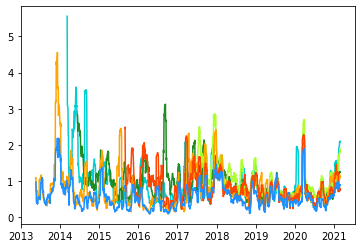

In [15]:
window = 21
dpy = 252
ann_factor = dpy / window

for coin in reversed(coinlist):
    exec(f"{coin}Log_df = pd.DataFrame()")
    exec(f"{coin}Log_df['Datestamp'] = {coin}_df['Datestamp']")
    exec(f"{coin}Log_df['Close'] = {coin}_df['Close']")
    exec(f"{coin}Log_df = {coin}Log_df.set_index(['Datestamp'])")
    exec(f"{coin}Log_df['Close'] = np.log({coin}Log_df['Close'])")

    exec(f"{coin}Log_df['LogRtn'] = {coin}Log_df[['Close']].diff()")
    exec(f"{coin}Log_df['real_var'] = np.square({coin}Log_df['LogRtn']).rolling(window).sum() * ann_factor")
    exec(f"{coin}Log_df['real_vol'] = np.sqrt({coin}Log_df['real_var'])")

    exec(f"plt.plot({coin}Log_df['real_vol'], color=colourdict['{coin}'])")
plt.show()

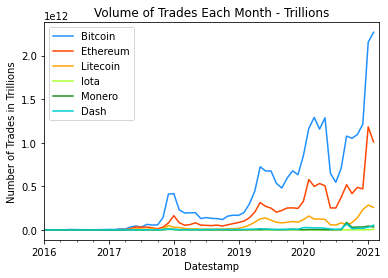

In [16]:
for coin in coinlist:
    exec(f"{coin}_groupbymonth_df['Volume'].sum().plot(label='{coin}', color=colourdict['{coin}'])")
    plt.title('Volume of Trades Each Month - Trillions')
    plt.ylabel('Number of Trades in Trillions')
    plt.xlim([datetime.date(2016,1,1), datetime.date(2021,3,14)])
    # plt.gca.legend((coinlist))
    plt.legend(loc="upper left")
plt.show()

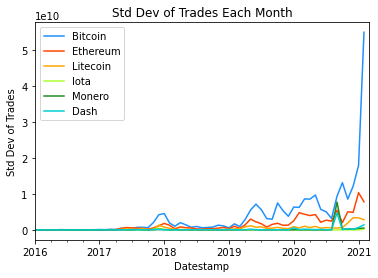

In [17]:
for coin in coinlist:
    exec(f"{coin}_groupbymonth_df['Volume'].std().plot(label='{coin}', color=colourdict['{coin}'])")
    plt.title('Std Dev of Trades Each Month')
    plt.ylabel('Std Dev of Trades')
    plt.xlim([datetime.date(2016,1,1), datetime.date(2021,3,14)])
    # plt.gca.legend((coinlist))
    plt.legend(loc="upper left")
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

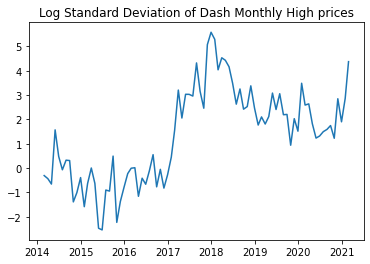

In [18]:
    # exec(f"np.log({coin}_df[['Close']]).diff()")

for coin in coinlist:

        plt.figure()
    exec(f"plt.plot(np.log({coin}_groupbymonth_df[['High']].std()))")
    exec(f"plt.title('Log Standard Deviation of {coin} Monthly High prices')")


<string>:1: RuntimeWarning: divide by zero encountered in log


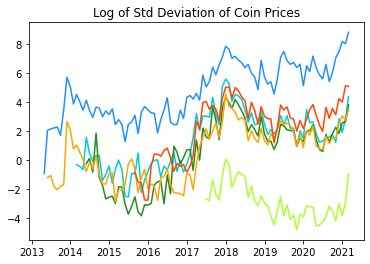

In [19]:
for coin in reversed(coinlist):
    plt.figure
    exec(f"plt.plot(np.log({coin}_groupbymonth_df[['High']].std()),color=colourdict['{coin}'])")
    plt.title('Log of Std Deviation of Coin Prices')
    ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2021-03-28'))  

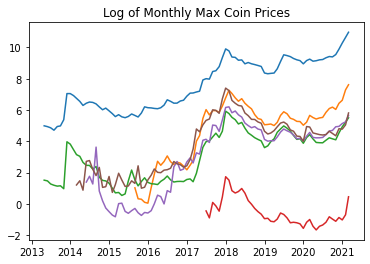

In [20]:
for coin in coinlist:
    plt.figure
    exec(f"plt.plot(np.log({coin}_groupbymonth_df[['High']].max()))")
    plt.title('Log of Monthly Max Coin Prices')
    ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2021-03-28'))  